In [1]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [4]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

The maximum word is 10000 , we have use num_words = 10000 which says that use only top 10,00 most frefrequent words, and here the test labeles and train labels are consist of 0s and 1s 0s for negative review and 1 for postivie reviews
----------

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [23]:
# code to decode one of the reviews back to English words

word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

# word_index is a dictionary mapping words to an integer index
# reverse_Word_index reverses it mapping interger to words
# decoded review decodes the review note that the indices are offser indices for pading , start of sequence and unkown


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Now here we are going to prepare the by changing sumnumbers into tensor and making all the other sets into usefull 
-----

In [8]:
# You can’t feed lists of integers into a neural network. You have to turn your lists into
# tensors

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


        
        
        



# the function vectorize creates an all-zero matrix of shape (len(sequences),dimension)
# the loop in the sequence specify indices of results[i] to 1s
# x_train vectorizesd training data
# x_test vectorized test data



In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# now we also vectorize your labels whihc is straightforward
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building Your Network

-> Two intermediate layers with 16 hidden units each


-> A third layer that will output the scalar prediction regarding the sentiment of
the current revie

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally we are gonna need to choose a loss function and optimizer because you are facing a binary classification problem and the output of your network is a probability. so we are gonna use the binary_crossentropy loss. crossentropy is a quantity from the field of information theory that measures the distance between probability distribution or in this case between the ground truth distribution and your predicition.
---


In [12]:
# we are passing your optimizer , loss function , metrics are strings 
# which is because rmsprop , binary_crossentropy and accuracy are packaged as part of keras


# model.compile(optimizer = 'rmsprop',
#             loss = 'binary_crossentropy',
#             metrics = ['accuracy'])

In [13]:
# We are configuring the optimizer here by not declaring them as strings

# from keras import optimizer

#del.compile(optimizer=optimizers.RMSprop(lr=0.001),
  #          loss = 'binary_crossentropy',
   #         metrics = ['accuracy'])


In [14]:
# Here we are customizing losses and metrics 

from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])


NameError: name 'optimizers' is not defined

Validating your approach


In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])




history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 68s 197ms/step - loss: 0.6327 - acc: 0.6282 - val_loss: 0.4386 - val_acc: 0.8550
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3737 - acc: 0.8893 - val_loss: 0.3233 - val_acc: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2516 - acc: 0.9240 - val_loss: 0.2930 - val_acc: 0.8820
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1909 - acc: 0.9394 - val_loss: 0.2727 - val_acc: 0.8922
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1499 - acc: 0.9538 - val_loss: 0.2888 - val_acc: 0.8847
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1275 - acc: 0.9610 - val_loss: 0.3304 - val_acc: 0.8745
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1035 - acc: 0.9697 - val_loss: 0.3003 - val_acc: 0.8859
Epoch 8/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0838 -

In [17]:
history_dict = history.history

history_dict.keys()
history_dict['acc']


[0.7426666617393494,
 0.8955333232879639,
 0.9214666485786438,
 0.9369333386421204,
 0.9508666396141052,
 0.9602000117301941,
 0.9676666855812073,
 0.9755333065986633,
 0.9811999797821045,
 0.9841333627700806,
 0.989799976348877,
 0.991599977016449,
 0.9932000041007996,
 0.9968666434288025,
 0.9967333078384399,
 0.9982666373252869,
 0.9986666440963745,
 0.9989333152770996,
 0.9997333288192749,
 0.9993333220481873]

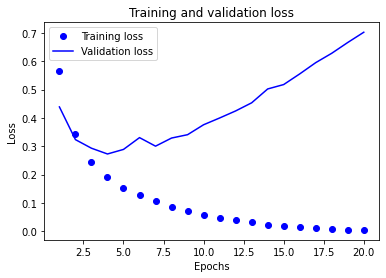

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

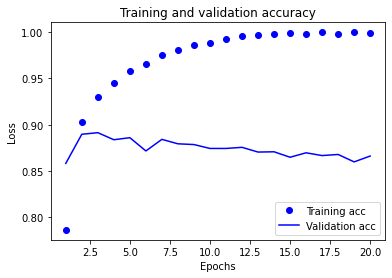

In [96]:
plt.clf()

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 17ms/step - loss: 0.5343 - accuracy: 0.7469
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2630 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1919 - accuracy: 0.9367
Epoch 4/4
782/782 [==============================] - 8s 2ms/step - loss: 0.3104 - accuracy: 0.8778


In [20]:
results

[0.3104321360588074, 0.8777999877929688]

Using a trained network to generate predictions on new data
--------------------------------------------------------------------------------------

After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [22]:
model.predict(x_test)

array([[0.15982366],
       [0.9988205 ],
       [0.39111358],
       ...,
       [0.11389077],
       [0.04109684],
       [0.4539255 ]], dtype=float32)